# DrawResolution, for FWHM


- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNRS

- creation date :June 5th 2020



In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools
import matplotlib.gridspec as gridspec
from matplotlib.patches import Circle,Ellipse

In [132]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (13, 13),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.size': 14}
plt.rcParams.update(params)

In [133]:
from scipy.interpolate import interp1d

## Constants for conversions

In [134]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
mm_to_micr=1e3
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm
nm_to_micr=0.001
nm_to_mm=1e-6

In [135]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [136]:
deg_to_rad=np.pi/180.

In [137]:
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_to_rad=1./rad_to_arcmin

## Configuration parameters at the telescope

#### telescope

In [138]:
Tel_Focal_Length=21.6 # m : Focal length of the telescope
Tel_Diameter=1.2 # m : Diameter of the telescope    
Tel_Fnum=Tel_Focal_Length/Tel_Diameter
plt_scale=206265/(Tel_Focal_Length*m_to_mm)  # arcsec per mm

In [139]:
plt_scale

9.549305555555556

#### Diffraction limit

$$
\Delta \theta = 1.22 \frac{\lambda}{D}
$$


$$
\Delta x = f \Delta \theta =  1.22 \cdot \lambda \cdot \frac{f}{D} 
$$

##### Approximation by a Gaussian

https://en.wikipedia.org/wiki/Airy_disk

$$
\sigma = 0.45 \cdot \lambda \cdot \frac{f}{D}
$$

$$
FWHM = \lambda \cdot \frac{f}{D}
$$

##### Diffraction at Hologram

$$
FWHM = \lambda \cdot \frac{f}{D} \cdot \frac{D}{D_{beam-holo}} =  \lambda \cdot \frac{f}{D} \cdot \frac{f}{D_{Holo-CCD}}
$$

In [140]:
# no unit, to be multiplied by wavelength say in mm units
#diffr_FWHM_entrance_perwl=Tel_Fnum
#diffr_FWHM_holo_perwl=Tel_Fnum/0.2

#### filter

In [141]:
Filt_D=0.200 # m distance of the filter position wrt CCD plane
Filt_size=3*inch_to_mm

#### Diffraction

In [142]:
# no unit, to be multiplied by wavelength say in mm units
diffr_FWHM_entrance_perwl=Tel_Fnum
diffr_FWHM_holo_perwl=Tel_Fnum/Filt_D

#### CCD detector

In [143]:
Det_xpic=10.0 # microns per pixel
Det_NbPix=4096 # number of pixels per CCD side For 400 only
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inch

In [144]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [145]:
def Dispersion(wl,a,D):
    """
    """
    X=D/a*wl/np.sqrt(1-(wl/a)**2)
    return X

In [146]:
def Dispersion_Rate(wl,a,D):
    """
    Dispersion_Rate(wl) : number of dx per wavelength
    input arguments:
    - wl : wavelength
    - a  : line pitch
    - D  : Distance CCD-Hologram
    
    recommended : all input arguments should be expressed in microns.
    
    - output : dx/dlambda, x in microns and lambdas in microns
    
    """
    #dxdlambda=D/a*(np.sqrt(1-(wl/a)**2)+ (wl/a)**2)/(1-(wl/a)**2)
    dxdlambda=D/a/(np.sqrt(1-(wl/a)**2))**3
    return dxdlambda 

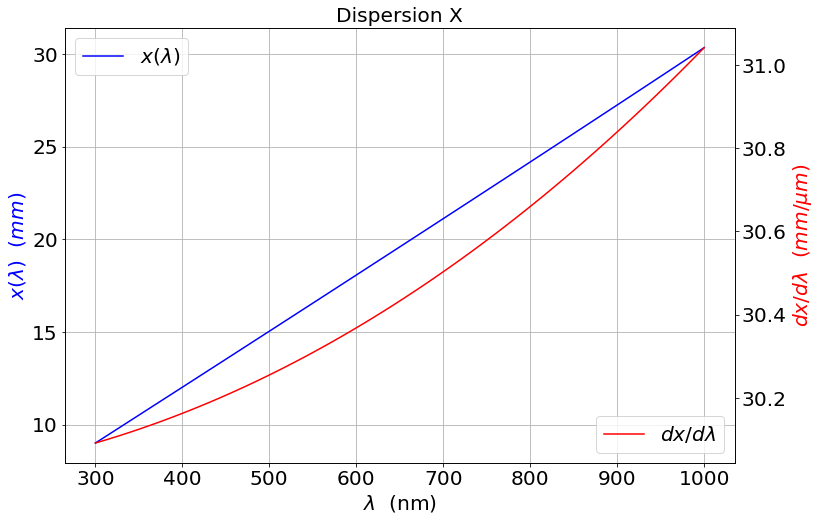

In [147]:
fig, ax1 = plt.subplots(figsize=(12,8))
WL=np.linspace(300.,1000.,100)
a=1/150.*mm_to_micr
D=200*mm_to_micr

Y1=Dispersion(WL*nm_to_micr,a,D)*micr_to_mm
ax1.plot(WL,Y1,"b",label="$x(\lambda)$")

ax1.set_xlabel("$\lambda$  (nm)")
ax1.set_ylabel("$x(\lambda)$  ($mm$)",color="blue")
ax1.set_title("Dispersion X")
ax1.legend(loc="upper left")
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

Y2=Dispersion_Rate(WL*nm_to_micr,a,D)*micr_to_mm

ax2.plot(WL, Y2,"r",label="$dx/d\lambda$")

ax2.set_xlabel("$\lambda$  (nm)")
ax2.set_ylabel("$dx/d\lambda$  ($mm/\mu m$)",color="red")
#ax2.set_title("Dispersion rate")
ax2.legend(loc="lower right")

fig.savefig("DispersionFormula_mm.pdf")
#ax2.grid()

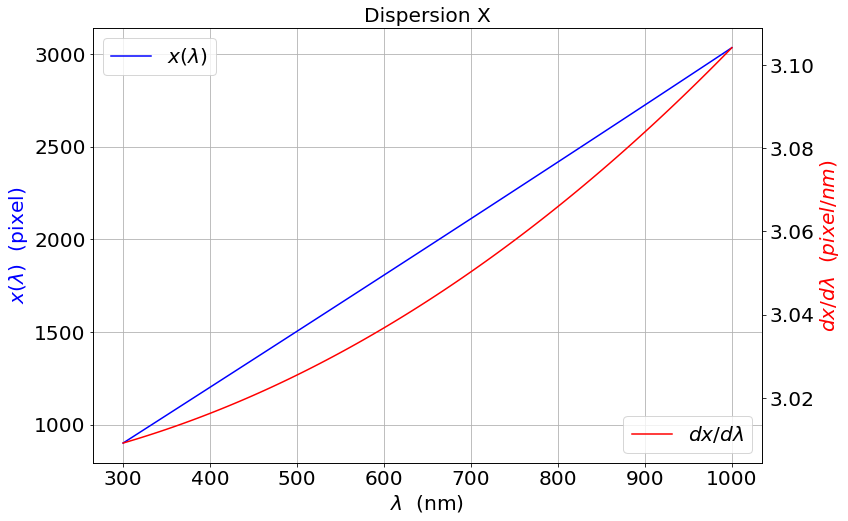

In [148]:
fig, ax1 = plt.subplots(figsize=(12,8))
WL=np.linspace(300.,1000.,100)
a=1/150.*mm_to_micr
D=200*mm_to_micr

Y1=Dispersion(WL*nm_to_micr,a,D)/Det_xpic   # pixel
ax1.plot(WL,Y1,"b",label="$x(\lambda)$")

ax1.set_xlabel("$\lambda$  (nm)")
ax1.set_ylabel("$x(\lambda)$  (pixel)",color="blue")
ax1.set_title("Dispersion X")
ax1.legend(loc="upper left")
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

Y2=Dispersion_Rate(WL*nm_to_micr,a,D)/Det_xpic*1e-3   # pixel per nm
ax2.plot(WL, Y2,"r",label="$dx/d\lambda$")
ax2.set_xlabel("$\lambda$  (nm)")
ax2.set_ylabel("$dx/d\lambda$  ($pixel/nm$)",color="red")
#ax2.set_title("Dispersion rate")
ax2.legend(loc="lower right")
#ax2.grid()
fig.savefig("DispersionFormula_pixel.pdf")

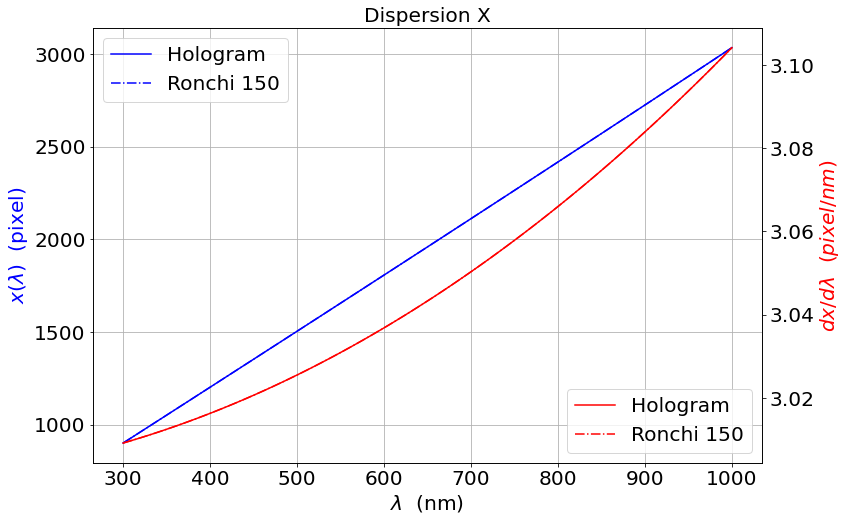

In [149]:
fig, ax1 = plt.subplots(figsize=(12,8))
WL=np.linspace(300.,1000.,100)
a=1/150.*mm_to_micr
D=200*mm_to_micr

Y1=Dispersion(WL*nm_to_micr,a,D)/Det_xpic   # pixel
Y1150=Dispersion(WL*nm_to_micr,1/150.*mm_to_micr,D)/Det_xpic   # pixel
ax1.plot(WL,Y1,"b",label="Hologram")
ax1.plot(WL,Y1150,"b-.",label="Ronchi 150")

ax1.set_xlabel("$\lambda$  (nm)")
ax1.set_ylabel("$x(\lambda)$  (pixel)",color="blue")
ax1.set_title("Dispersion X")
ax1.legend(loc="upper left")
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

Y2=Dispersion_Rate(WL*nm_to_micr,a,D)/Det_xpic*1e-3   # pixel per nm
ax2.plot(WL, Y2,"r",label="Hologram")
Y2150=Dispersion_Rate(WL*nm_to_micr,1/150.*mm_to_micr,D)/Det_xpic*1e-3   # pixel per nm
ax2.plot(WL, Y2150,"r-.",label="Ronchi 150")


ax2.set_xlabel("$\lambda$  (nm)")
ax2.set_ylabel("$dx/d\lambda$  ($pixel/nm$)",color="red")
#ax2.set_title("Dispersion rate")
ax2.legend(loc="lower right")
#ax2.grid()

## Input file

In [150]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y
NWL=4
NBTOT=NBEAM*NWL

In [151]:
theta_x=0.  # angle in arcmin
theta_y=0.  # angle in arcmin 

In [152]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [153]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [154]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [155]:
Beam4_Rayfile="Beam4_Rayfile_{:d}_allwl_{}_{}".format(NBTOT,theta_x_str,theta_y_str)

In [156]:
Beam4_Rayfile

'Beam4_Rayfile_484_allwl_m00_m00'

In [157]:
order="OP1"
order_str="+1"

In [158]:
WL=np.array([400.,600.,800.,1000.])

# Read input files

In [159]:
disperser_name=["Ronchi 150","Hologram"]
disperser_color=["b","r"]

In [160]:
infileR150data_csv="R150_FWHMXY_MULTIWLOUT.csv"
infileHOEdata_csv="HOE_FWHMXY_MULTIWLOUT.csv"

In [161]:
all_files=[infileR150data_csv,infileHOEdata_csv]

In [162]:
all_df=[]
for file in all_files:
    df = pd.read_csv(file,index_col=0)
    all_df.append(df)

In [163]:
all_df

[      fwhmx     fwhmy    sigmax    sigmay
 0  0.022837  0.006577  0.015346  0.005354
 1  0.092401  0.029906  0.034279  0.011648
 2  0.175270  0.059668  0.061148  0.020520
 3  0.299727  0.099433  0.096329  0.032048,
       fwhmx     fwhmy    sigmax    sigmay
 0  0.031794  0.010679  0.009504  0.003174
 1  0.007271  0.002398  0.002174  0.000725
 2  0.043821  0.015414  0.013418  0.004469
 3  0.122738  0.042037  0.037582  0.012480]

In [164]:
all_resox= []
for df in all_df:
    all_resox.append(df["fwhmx"].values)

In [165]:
all_resoy= []
for df in all_df:
    all_resoy.append(df["fwhmy"].values)

# Resolution

## Interpolate

In [166]:
Xint=np.linspace(WL[0],WL[-1],200)

In [167]:
all_Yint_mm=[]
all_Yint_arcsec=[]
for resox in all_resox:
    f = interp1d(WL, resox, kind='cubic')
    Yint=f(Xint)
    all_Yint_mm.append(Yint)
    all_Yint_arcsec.append(Yint*plt_scale)

## Plot 

In [168]:
# Tableau Colors from the 'T10' categorical palette (the default color cycle): 
#{'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 
#'tab:cyan'} (case-insensitive);

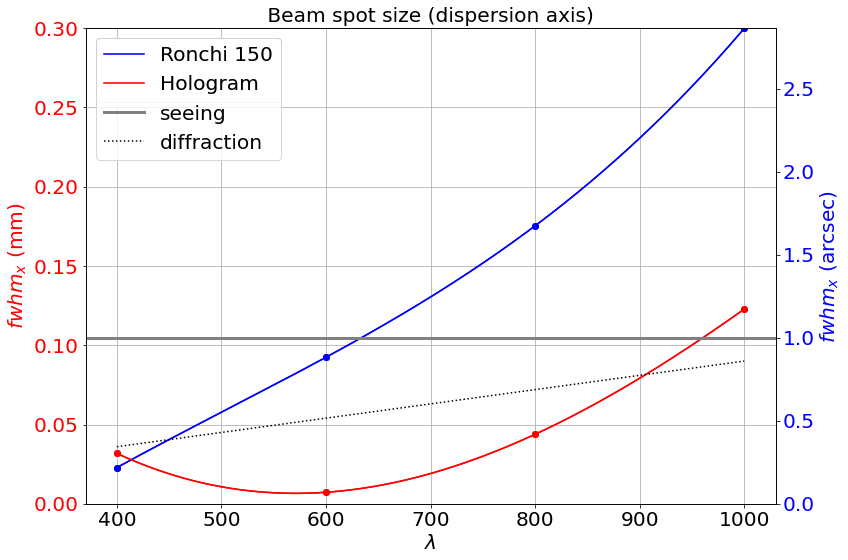

In [169]:
fig, ax1 = plt.subplots(figsize=(12,8))

#color = 'tab:red'
color = 'red'

idx=0
for Yint in all_Yint_mm: 
    if idx==2:
        idx+=1
        continue
    ax1.plot(WL,all_resox[idx],"o",color=disperser_color[idx])
    ax1.plot(Xint,Yint,'-',label=disperser_name[idx],color=disperser_color[idx])
    #ax1.plot(Xint,diffr_FWHM_holo_perwl*Xint*nm_to_mm,":",color='k')
    idx+=1

ax1.set_title(" Beam spot size (dispersion axis) ")
ax1.set_xlabel("$\lambda$")
ax1.set_ylabel("$fwhm_x$ (mm)",color=color)
ax1.grid()
ax1.legend()
ax1.set_ylim(0.,0.3)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
color = 'blue'
idx=0
for Yint in all_Yint_arcsec: 
    if idx==2:
        idx+=1
        continue
    ax2.plot(WL,all_resox[idx]*plt_scale,"o",color=disperser_color[idx])
    ax2.plot(Xint,Yint,'-',label=disperser_name[idx],color=disperser_color[idx])
   
    idx+=1

ax2.axhline(y=1.,color="grey",lw=3,label="seeing")
ax2.plot(Xint,diffr_FWHM_holo_perwl*Xint*nm_to_mm*plt_scale,":",color='black',label="diffraction")
ax2.legend()


ax2.set_ylabel('$fwhm_x$ (arcsec)', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0.,0.3*plt_scale)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("RESOLUTION_PSF_FWHMX_AUXTEL_v2.pdf")
plt.show()

In [170]:
idx_wl750=find_nearest_idx(Xint, 750)
idx_wl1000=find_nearest_idx(Xint,1000.)

In [171]:
fwhm_750_R150_mm=all_Yint_mm[0][idx_wl750]
fwhm_750_HOE_mm=all_Yint_mm[1][idx_wl750]

In [172]:
fwhm_750_R150_arcsec=all_Yint_arcsec[0][idx_wl750]
fwhm_750_HOE_arcsec=all_Yint_arcsec[1][idx_wl750]

In [173]:
fwhm_750_R150_mm

0.1516465872982154

In [174]:
fwhm_750_HOE_mm

0.02991886753762605

In [175]:
fwhm_750_R150_arcsec

1.4481195985678887

In [176]:
fwhm_750_HOE_arcsec

0.2857044079929832

In [177]:
fwhm_1000_R150_mm=all_Yint_mm[0][idx_wl1000]
fwhm_1000_HOE_mm=all_Yint_mm[1][idx_wl1000]

In [178]:
fwhm_1000_R150_mm

0.2997270378597037

In [179]:
fwhm_1000_HOE_mm

0.12273822826132985

In [180]:
fwhm_1000_R150_arcsec=all_Yint_arcsec[0][idx_wl1000]
fwhm_1000_HOE_arcsec=all_Yint_arcsec[1][idx_wl1000]

In [181]:
fwhm_1000_R150_arcsec

2.862185067783879

In [182]:
fwhm_1000_HOE_arcsec

1.172064845014963

In [183]:
all_Yint_mm=[]
all_Yint_arcsec=[]
for resoy in all_resoy:
    f = interp1d(WL, resoy, kind='cubic')
    Yint=f(Xint)
    all_Yint_mm.append(Yint)
    all_Yint_arcsec.append(Yint*plt_scale)

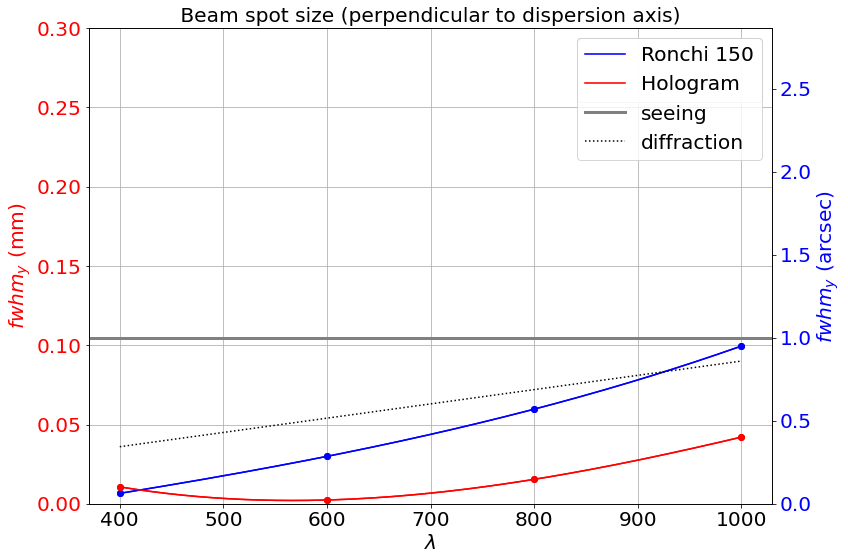

In [184]:
fig, ax1 = plt.subplots(figsize=(12,8))

#color = 'tab:red'
color = 'red'

idx=0
for Yint in all_Yint_mm: 
    if idx==2:
        idx+=1
        continue
    ax1.plot(WL,all_resoy[idx],"o",color=disperser_color[idx])
    ax1.plot(Xint,Yint,'-',label=disperser_name[idx],color=disperser_color[idx])
    idx+=1

ax1.set_title(" Beam spot size (perpendicular to dispersion axis) ")
ax1.set_xlabel("$\lambda$")
ax1.set_ylabel("$fwhm_y$ (mm)",color=color)
ax1.grid()
ax1.legend()
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0.,0.3)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
color = 'blue'
idx=0
for Yint in all_Yint_arcsec: 
    if idx==2:
        idx+=1
        continue
    ax2.plot(WL,all_resoy[idx]*plt_scale,"o",color=disperser_color[idx])
    ax2.plot(Xint,Yint,'-',label=disperser_name[idx],color=disperser_color[idx])
    idx+=1

ax2.axhline(y=1.,color="grey",lw=3,label="seeing")  
ax2.plot(Xint,diffr_FWHM_holo_perwl*Xint*nm_to_mm*plt_scale,":",color='black',label="diffraction")
ax2.legend()

ax2.set_ylabel('$fwhm_y$ (arcsec)', color=color)  # we already handled the x-label with ax1
#ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0.,0.3*plt_scale)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("RESOLUTION_PSF_FWHMY_AUXTEL_v2.pdf")
plt.show()

In [185]:
idx=find_nearest_idx(Xint,750)

In [186]:
Yint[idx]

0.10086264604994041

In [187]:
Yint[idx]*16.4/1000

0.0016541473952190226

In [188]:
idx=find_nearest_idx(Xint,1000)

In [189]:
Yint[idx]

0.4014240153876916

In [190]:
Yint[idx]*16.4/1000

0.006583353852358142

## $R(\lambda)$


- TBD correct units

In [191]:
WL

array([ 400.,  600.,  800., 1000.])

In [192]:
all_Yint_mm=[]
all_Yint_arcsec=[]
for resox in all_resox:
    f = interp1d(WL, resox, kind='cubic')
    Yint=f(Xint)
    all_Yint_mm.append(Yint)
    all_Yint_arcsec.append(Yint*plt_scale)

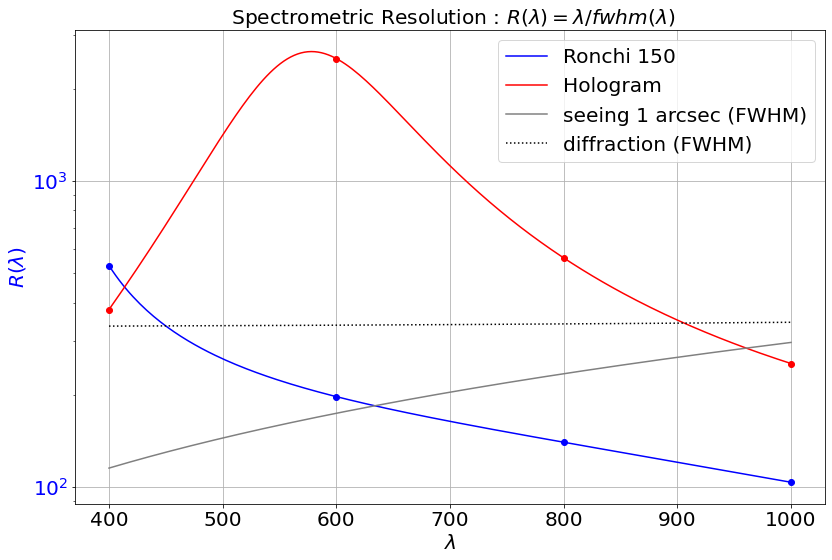

In [194]:
fig, ax1 = plt.subplots(figsize=(12,8))

SEEING_ARCSEC=1.0  # arcsec
SEEING_MM=SEEING_ARCSEC/plt_scale # sigma Seeing in mm
a=1/150.
D=200
color = 'blue'
idx=0
for Yint in all_Yint_mm:        
    Y1=WL*micr_to_mm/all_resox[idx]*Dispersion_Rate(WL*nm_to_micr,a*mm_to_micr,D=D*mm_to_micr)*micr_to_mm
    Y2=Xint*micr_to_mm/Yint*Dispersion_Rate(Xint*nm_to_micr,a*mm_to_micr,D=D*mm_to_micr
                                           )*micr_to_mm
    ax1.plot(WL,Y1,"o",color=disperser_color[idx])
    ax1.plot(Xint,Y2,'-',label=disperser_name[idx],color=disperser_color[idx])
    idx+=1
    
# seeing
Y3=Xint*micr_to_mm/SEEING_MM*Dispersion_Rate(Xint*nm_to_micr,1./150.*mm_to_micr,D=D*mm_to_micr)*micr_to_mm
ax1.plot(Xint,Y3,'-',label="seeing 1 arcsec (FWHM)",color="grey")
Y4=Xint*micr_to_mm/(diffr_FWHM_holo_perwl*Xint*nm_to_mm)*Dispersion_Rate(Xint*nm_to_micr,1./150.*mm_to_micr,D=D*mm_to_micr)*micr_to_mm
ax1.plot(Xint,Y4,':',label="diffraction (FWHM)",color="black") 

ax1.set_title(" Spectrometric Resolution : $R(\lambda)= \lambda/fwhm(\lambda)$")
ax1.set_xlabel("$\lambda$")
ax1.set_ylabel("$R(\\lambda)$",color=color)
ax1.grid()
ax1.legend()
ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.yscale("log")
plt.savefig("RLAMBDA_PSF_AUXTEL_FWHM.pdf")
plt.show()